In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image
from os import path

In [177]:
style.use('seaborn-poster')
style.use('seaborn-deep')

In [10]:
df = pd.read_csv('top2018wlyrics.csv')

This dataset contains audio features and lyrics of the top 100 streamed tracks on Spotify in 2018. We'll begin by looking at the dataset's head.

In [5]:
df.head()

,Unnamed: 0,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics
0,0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,[Intro] And they wishin' and wishin' and wis...
1,1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,[Intro] Yeah [Chorus] Who am I? Someone tha...
2,2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,[Intro: Post Malone] Hahahahaha Tank God Ayy...
3,3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0,"[Chorus: Post Malone] Damn, my AP goin' psyc..."
4,4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0,"[Intro: Drake] Trap, TrapMoneyBenny This shi..."


First let's get a sense of the distribution of our data by feature

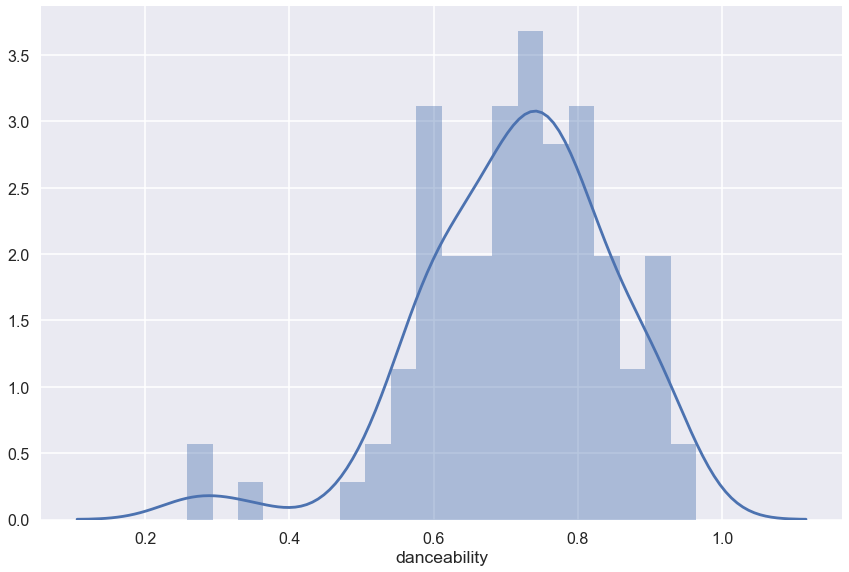

In [178]:
sns.distplot(df['danceability'], bins=20)
plt.show()

First up we have the danceability score. This is calculated as a float ranging from 0.0 to 1.0 where 1.0 would be the ultimate dance song. While there are a few songs with lower ratings, much of the data is clustered around 0.7 suggesting that a high danceability score significantly increases a song's popularity.

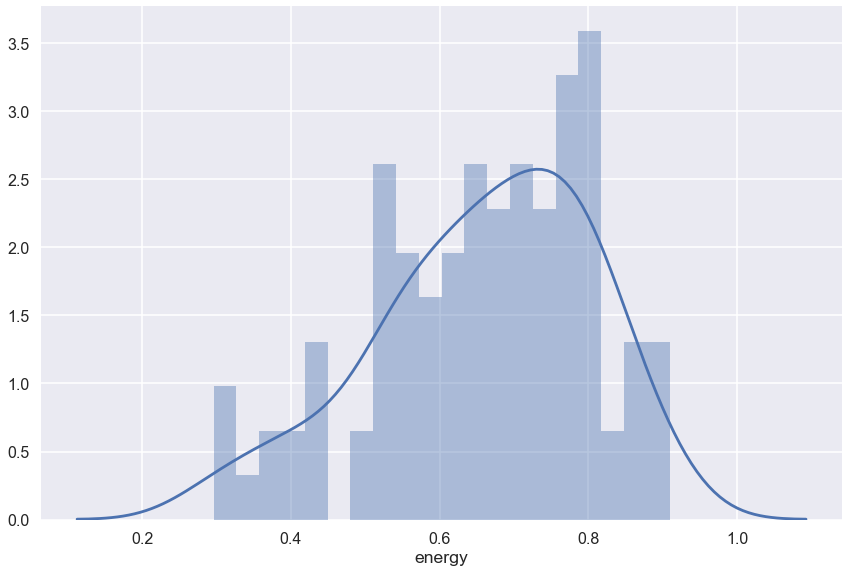

In [179]:
sns.distplot(df['energy'], bins=20)
plt.show()

Similar to danceability, the energy ratings are generally on the higher end of the spectrum. Later we will examine whether energy and danceability are correlated. It seems that a high energy score is also a desirable trait. 

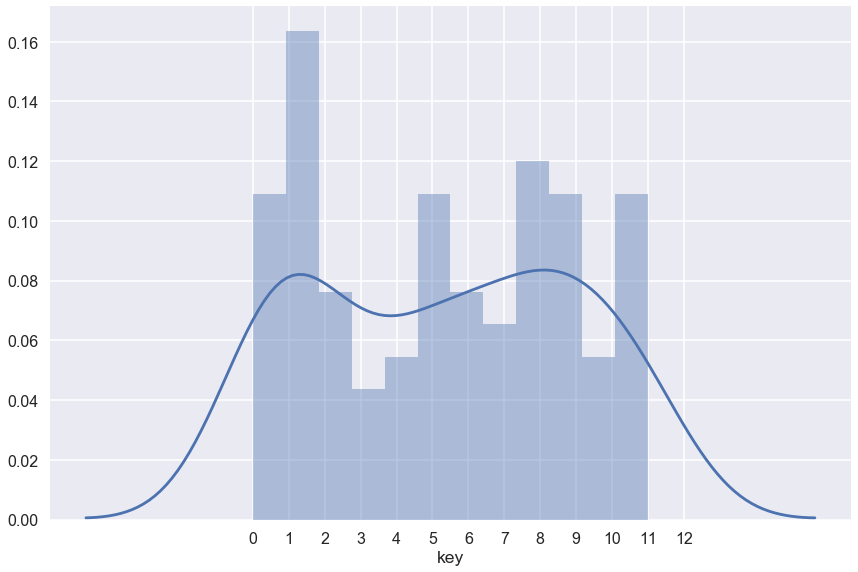

In [180]:
xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sns.distplot(df['key'], bins=12)
plt.xticks(xticks)
plt.show()

There are 12 possible keys in music. In this dataset, 0 corresponds to the key of C, 1 is C#, etc. Overall C# seems to be the most popular key among these songs, although every key is represented with the exception of B. The most common reason one key would be chosen over another is to suit the vocal range of the singer, so perhaps B is not a good key for many people to sing in. 

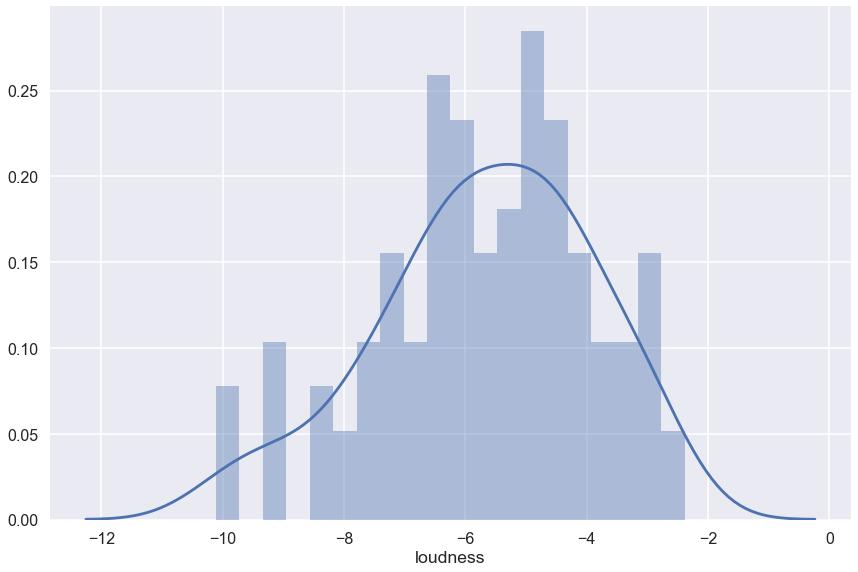

In [181]:
sns.distplot(df['loudness'], bins=20)
plt.show()

The loudness category is measured by the average decible rating per track. Recently, a phenomenon dubbed the 'loudness wars' has seen a trend in recordings being pushed louder and louder so that they stand out among other tracks for a listener's attention. This seems to be corroborated in this data.

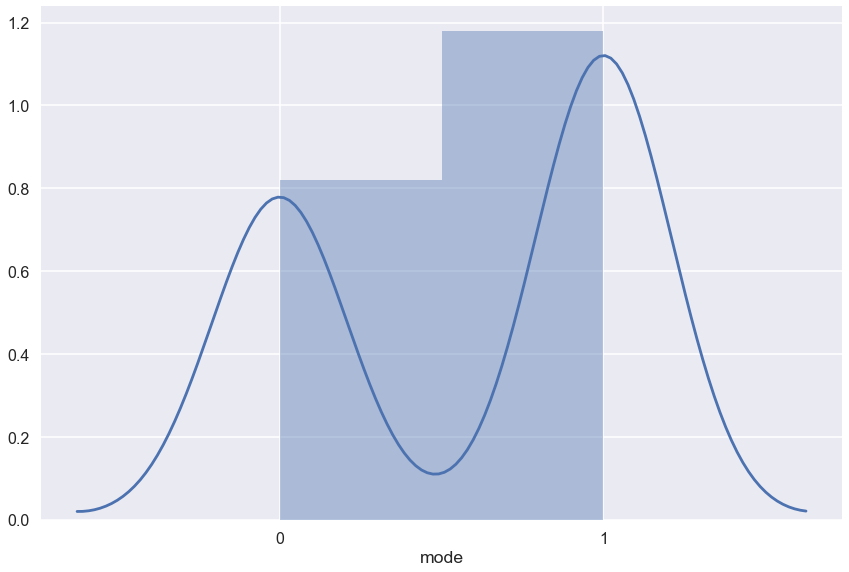

In [182]:
sns.distplot(df['mode'], bins=2)
plt.xticks([0,1])
plt.show()

Mode refers to whether a track is in a major or minor key. In this dataset, 0 represents minor and 1 represents major. It seems that major key songs tend to be more popular.

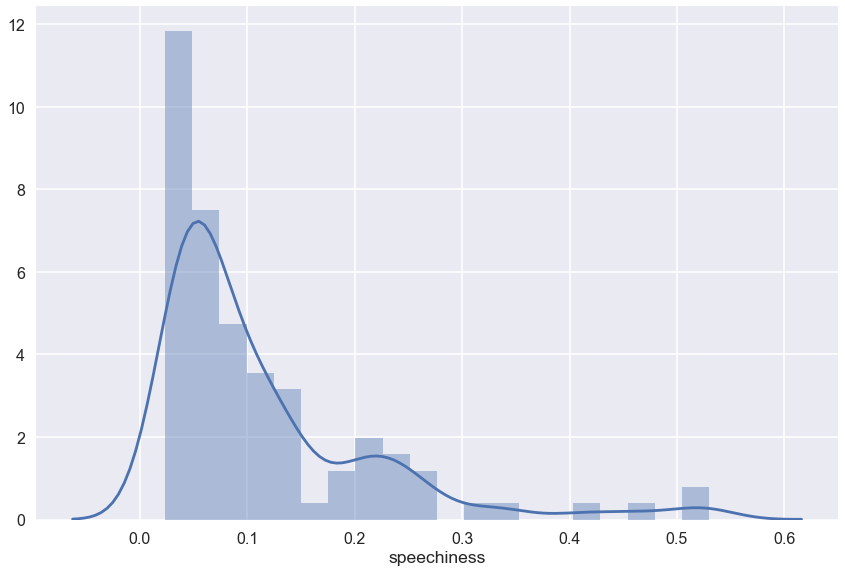

In [183]:
sns.distplot(df['speechiness'], bins=20)
plt.show()

speechiness is a representation of the presence of spoken words in the track, a speechiness rating of 1.0 would indicate a recording of something like an audio book. It is important to remember that pitched singing is not included in the speechiness rating, so this suggests that most songs in this dataset are sung rather than spoken. 

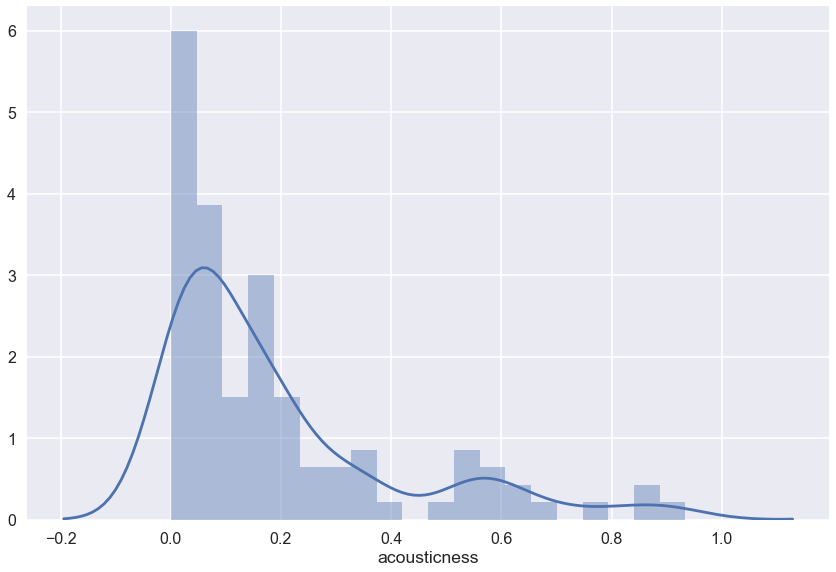

In [184]:
sns.distplot(df['acousticness'], bins=20)
plt.show()

acousticness is a confidence rating on whether a track is performed with acoustic instruments, where 1.0 suggests that the track is completely acoustic. Most of the data has a very low acousticness rating, which leads us to believe that electronic instruments are more popular. 

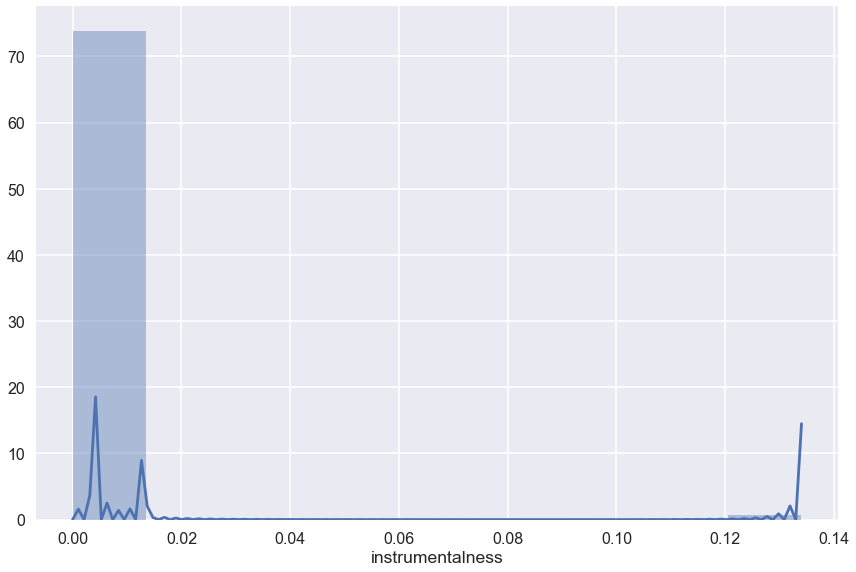

In [185]:
sns.distplot(df['instrumentalness'], bins=10)
plt.show()

The instrumentalness rating determines the vocal to instrumental ratio of a track, where 1.0 is completely instrumental. The vast majority of songs in this dataset are extremely vocal heavy, and none are completely instrumental. 

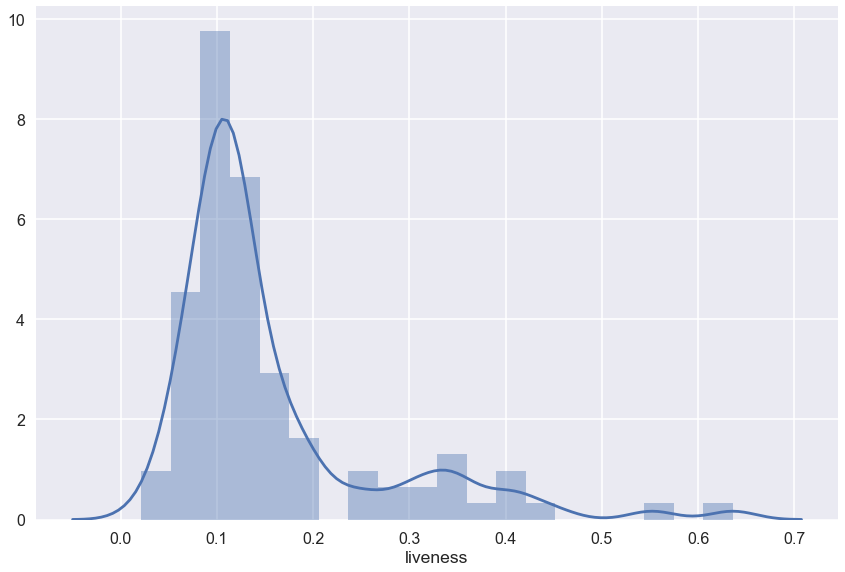

In [186]:
sns.distplot(df['liveness'], bins=20)
plt.show()

The liveness rating describes confidence that the recording is from a live concert. Overall the vast majority of these songs were recorded in a studio environment. 

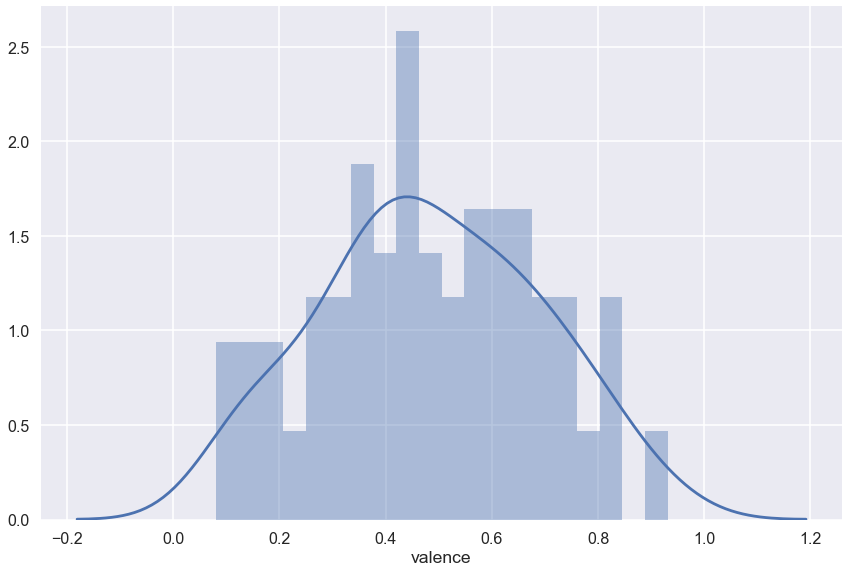

In [187]:
sns.distplot(df['valence'], bins=20)
plt.show()

Valence referse to the "positivity" or "cheeriness" of the track, where 1.0 is the most "cheery". Most of our data is in the middle of the range here. 

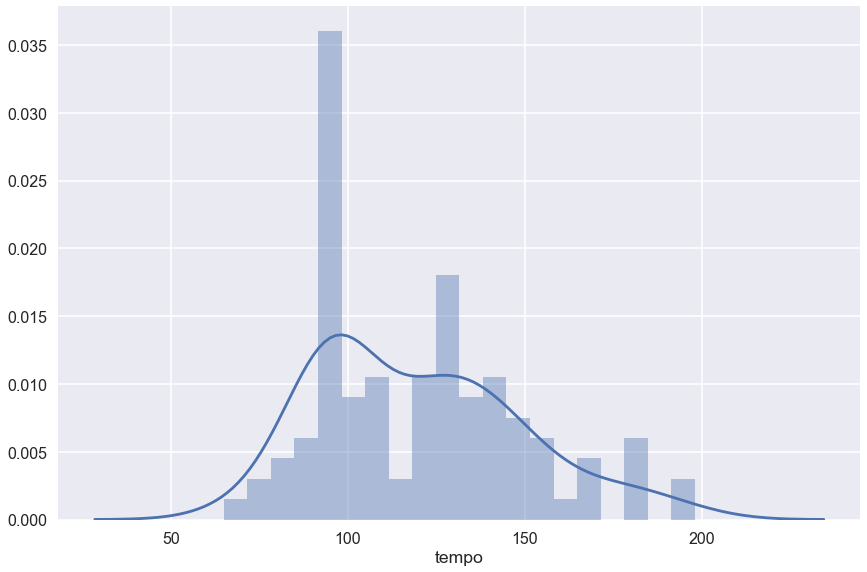

In [188]:
sns.distplot(df['tempo'], bins=20)
plt.show()

The tempo of each track is measured in beats per minute. The two most popular tempos seem to be around 90bpm and 120 bpm. Later on we will look into whether danceability and tempo are correlated. 

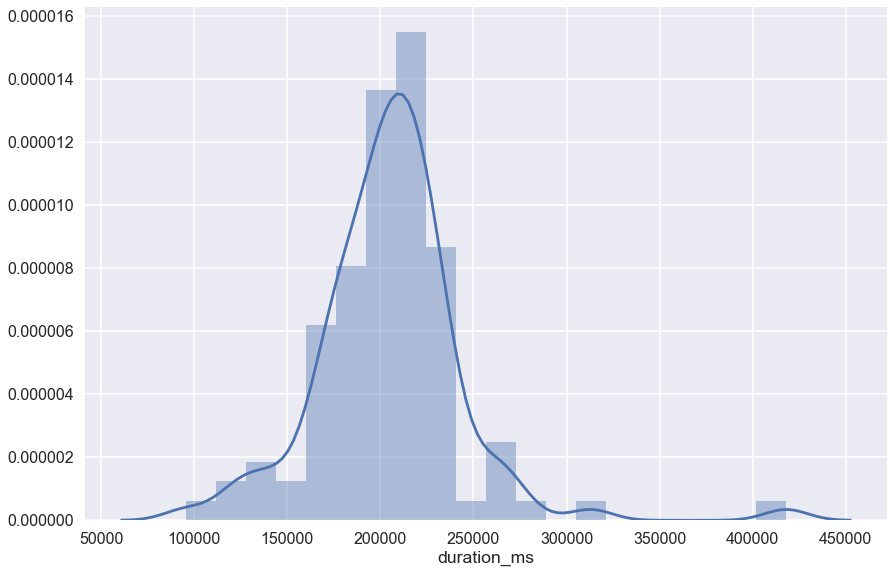

In [196]:
sns.distplot(df['duration_ms'], bins=20)
plt.show()

Looking at the duration of each track, a majority of the songs are around 200000 milliseconds, or 3 minutes. 

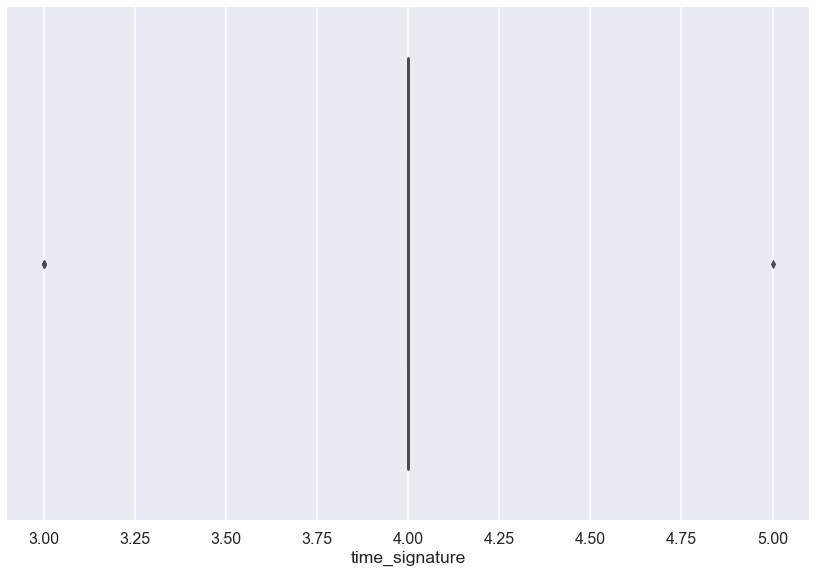

In [250]:
sns.boxplot(df['time_signature'])
plt.show()

Finally, looking at the time signature of the songs reveals that an overwhelming majority of the songs are in 4/4 time. This is not particularly surprising as 4/4 is by far the most common time in modern music. Looking at the value counts reveals that 96 out of all 100 songs are in 4/4, 3 are in 3/4, and 1 is in 5/4

In [251]:
df['time_signature'].value_counts()

4.0    96
3.0     3
5.0     1
Name: time_signature, dtype: int64

# Correlations
Now that we've gotten a sense for the distribution of our data, let's look into some possible correlations. 

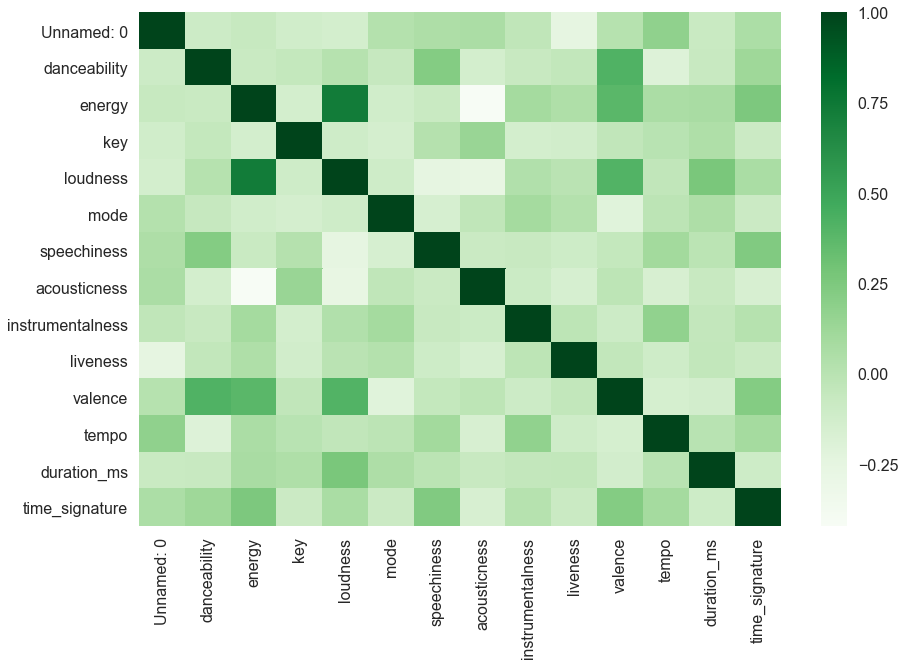

In [314]:
sns.heatmap(df.corr(), cmap='Greens')
plt.show()

According to this heatmap, the strongest correllation is between the loudness and energy categories. It also shows a correlation between valence and danceability, as well as loudness and valence. 

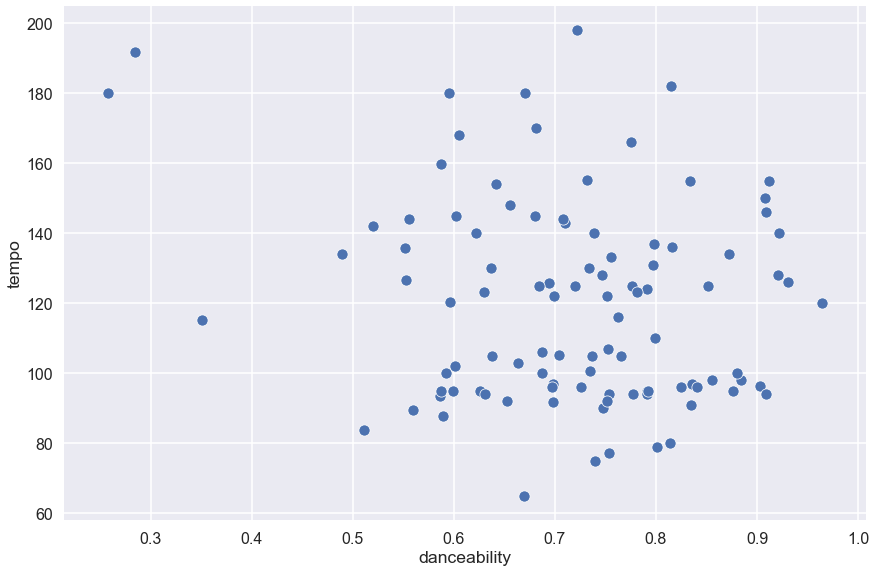

In [190]:
sns.scatterplot('danceability', 'tempo', data=df)
plt.show()

I initially though that there would be a correlation between tempo and danceability. Looking at this plot we can see that most of the tempos are in the 90 bpm or 130 bpm range. The songs that scored highest on danceability are all between 120 and 160 bpm, but beyond that it doesn't seem as correlated as I expected.

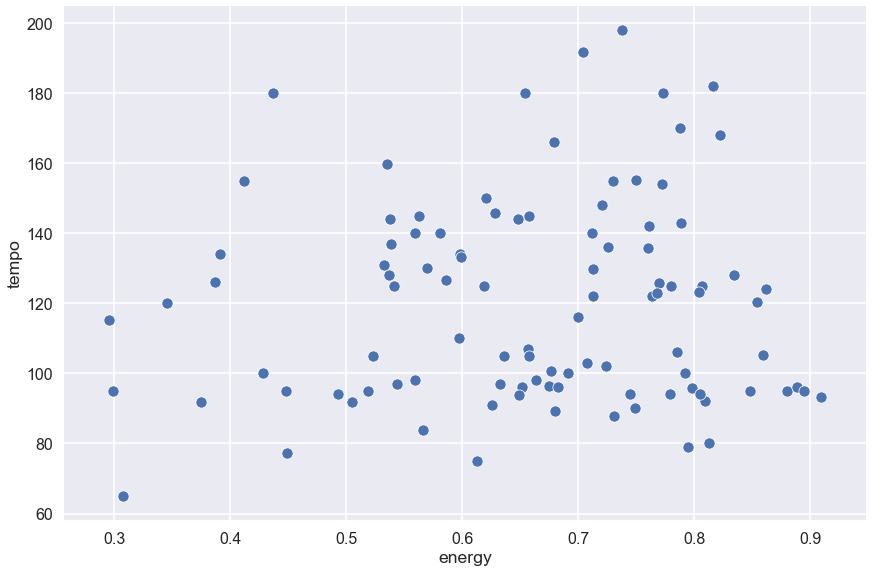

In [228]:
sns.scatterplot('energy', 'tempo', data=df)
plt.show()

I also initially expected songs with higher tempo to have a higher energy score. Looks like this is not always the case. 

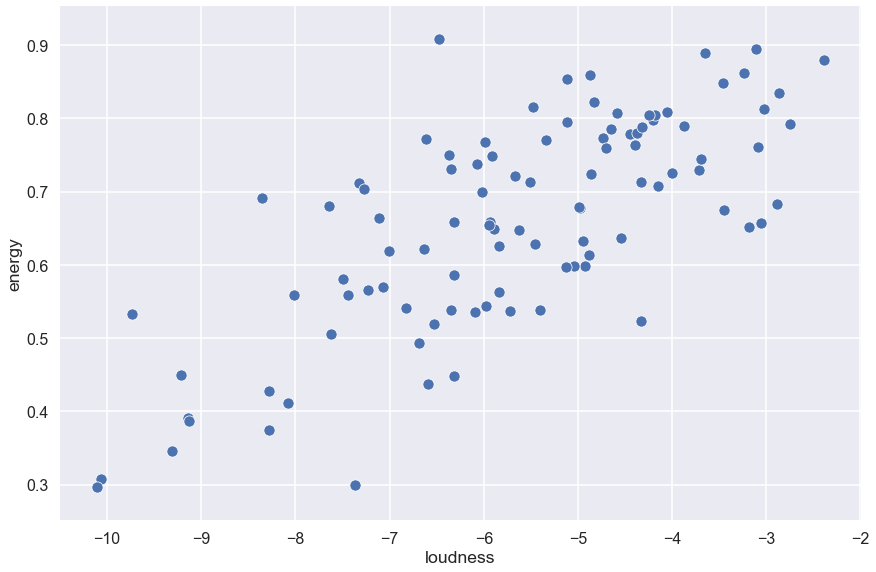

In [192]:
sns.scatterplot('loudness', 'energy', data=df)
plt.show()

Unlike tempo and energy, there is a strong correlation between loudness and energy. Songs with a higher decibel level clearly are rated as more energetic. 

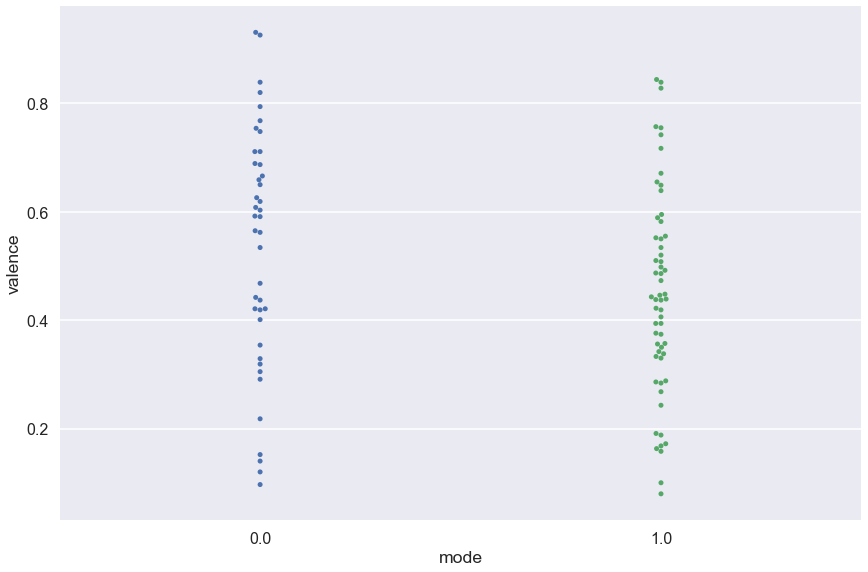

In [239]:
sns.swarmplot('mode', 'valence', data=df)
plt.show()

When comparing valence (the "cheeriness") of the song to the mode, interstingly enough songs in a minor key appear to have higher valence values. Typically in music a minor key implies a sad song, and major keys sound happier. This does not appear to be the case in this dataset. 

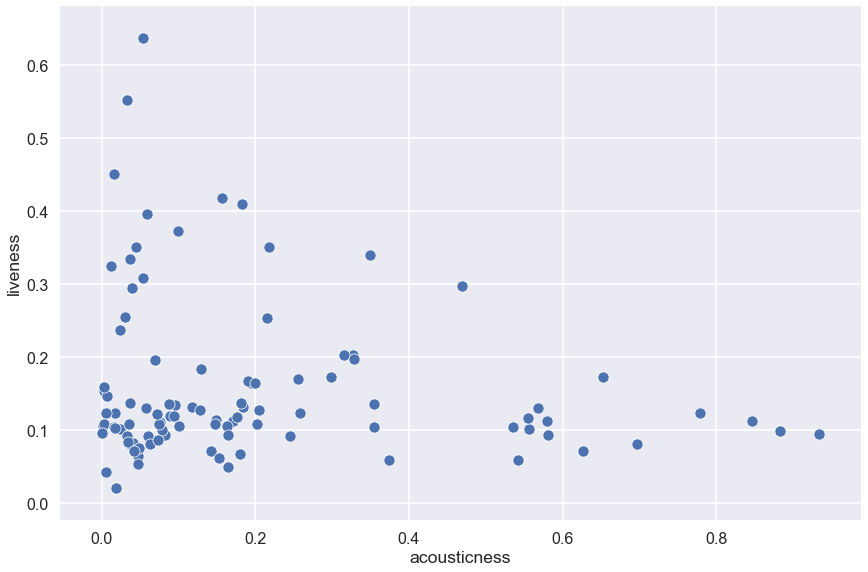

In [201]:
sns.scatterplot('acousticness', 'liveness', data=df)
plt.show()

Interestingly enough, there seems to be a negative correlation between liveness and acousticness. I had expected that recordings of live concerts would contain more acoustic instruments, but this plot suggests the opposite. 

# Wordcloud

To get a sense of the lyrical content, we will visualise the most commonly occuring words with a wordcloud. 

In [302]:
#Join lyrics for wordcloud
lyrics = ' '.join(lyrics for lyrics in df['lyrics'])
stop_words = ['verse', 'chorus', 'bridge', 'intro', 'pre chorus', 'ooh', 'oh', 'yeah', 'na', 'ooh' 'pre', 'la', 'outro', 'nigga']
stopwords=set(STOPWORDS)
stopwords.update(stop_words)

In [307]:
#Create png mask
spotify_mask = np.array(Image.open('spotifylogo3.png'))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
transformed_mask = np.ndarray((spotify_mask.shape[0], spotify_mask.shape[1]), np.int32)

for i in range(len(spotify_mask)):
    transformed_mask[i] = list(map(transform_format, spotify_mask[i]))

(-0.5, 1599.5, 1599.5, -0.5)

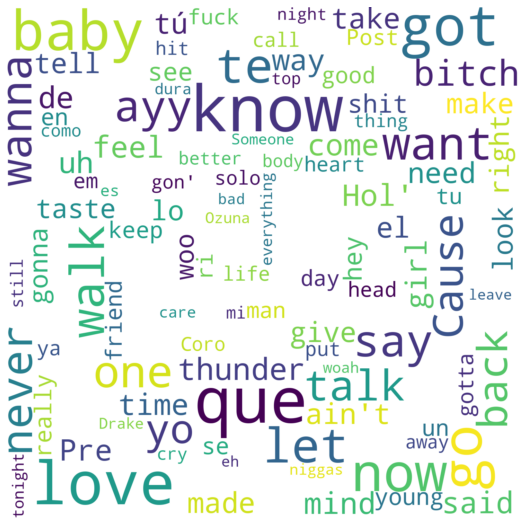

In [309]:
lyricwordcloud = WordCloud(max_words=100, collocations=False, stopwords=stopwords, background_color='white', mask=transformed_mask).generate(lyrics)

plt.imshow(lyricwordcloud, interpolation='bilinear')
plt.axis('off')

In [316]:
lyricwordcloud.to_file('wordcloud1.png')